#Ans 1:

$f_i(w) = \frac{\lambda}{2n}||w||^2_2 + \frac{1}{n}L(y_i, w^Tx_i)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
print(iris.data.shape)

(150, 4)


In [5]:
A = iris.data

In [6]:
print(iris.target.shape)

(150,)


In [7]:
min(iris.target)

0

In [8]:
C = len(iris.target_names)
print(C)

3


In [9]:
n = iris.data.shape[0]
d = iris.data.shape[1]

In [10]:
y = 1.0*np.ones([A.shape[0],])

In [11]:
for i in range(iris.target.shape[0]):
  if iris.target[i] != 1:
    y[i] = -1

In [12]:
indexarr = np.arange(n)
np.random.shuffle(indexarr)

In [13]:
print(indexarr)

[ 66   0  28 108  17 107 100  61  67  16 133  91  99  25 144  14  39 116
  85  38   6  84 101  21 148 124 129  45  27  79 141 149 147 126  43  77
 113  31  73  74 121  69 125 118  47  11  90 103  70 140  35 143 102 104
  33  29  46  63  53 131  97 122 105  76  59  51  89   9  23  22  80  71
 111  55 142   2  58  12  34  57  56 138  72   4 136   3  98 114  13  87
 123 145  83   1  95 146  50 130 110  68  10  32 115  60  15  64  36  52
  86 128   8  88 139 117 132 106  96  24  48  37  78  81 109 135  93  82
  65  49 119  75  41  44  92  42  94  30  19  40  20  26 127  54 112  18
   5 134 137  62 120   7]


In [14]:
train_data = np.ones([int(len(indexarr)*0.8),A.shape[1]])

In [15]:
for i in range(int(len(indexarr)*0.8)):
  train_data[i] = A[indexarr[i]]

In [16]:
test_data = np.ones([int(len(indexarr)*0.2),A.shape[1]])

for i in range(int(len(indexarr)*0.2)):
  test_data[i] = A[indexarr[i + int(len(indexarr)*0.8)]]

In [17]:
train_label = np.ones([int(len(indexarr)*0.8),])

In [18]:
for i in range(int(len(indexarr)*0.8)):
  train_label[i] = y[indexarr[i]]

In [19]:
test_label = np.ones([int(len(indexarr)*0.2),])

for i in range(int(len(indexarr)*0.2)):
  test_label[i] = y[indexarr[i + int(len(indexarr)*0.8)]]

In [20]:
def predict(w, x):
  if np.matmul(w.transpose(),x)<0:
    return -1
  else:
    return 1

In [21]:
def compute_accuracy(data, labels, model_w):
  no_correct = 0
  for i in range(len(labels)):
    if predict(model_w, data[i]) == labels[i]:
      no_correct += 1
  return no_correct/len(labels)

In [22]:
def compute_loss_h(w, x, y):
  return max(0, 1 - np.multiply(y,np.matmul(w.transpose(),x)))

In [23]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_h(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [24]:
def compute_grad_loss_h(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    if compute_loss_h(model_w, x, y) != 0:
      arr[i] = (lamda/n)*model_w[i] - y*x[i]
    else:
      arr[i] = (lamda/n)*model_w[i]
  return arr

In [25]:
def OPT1(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = w - np.multiply(step, compute_grad_loss_h(data[i], label[i], w, lamda))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [26]:
num_epochs = 1000
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,1001)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT1(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

#Ans 6(a) Plot of objective function values for different values of lambda

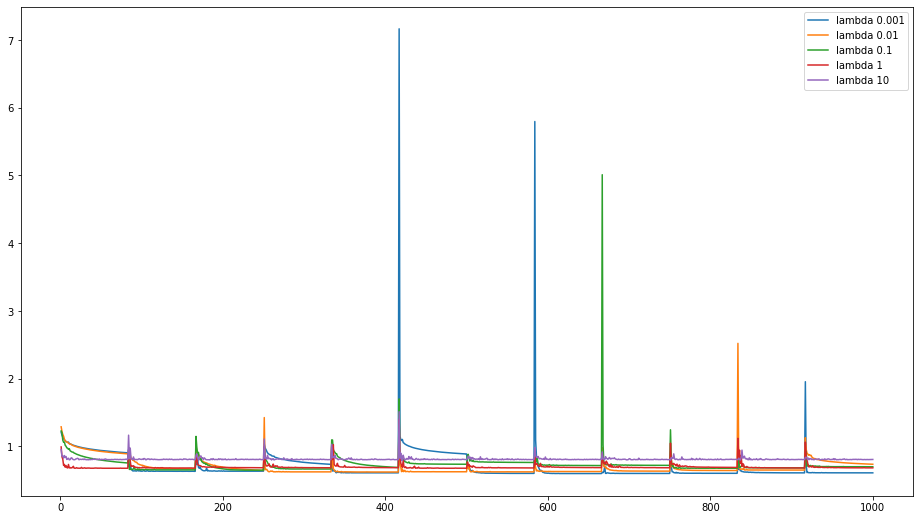

In [27]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 6(b) Plot of test set accuracy values for different values of lambda

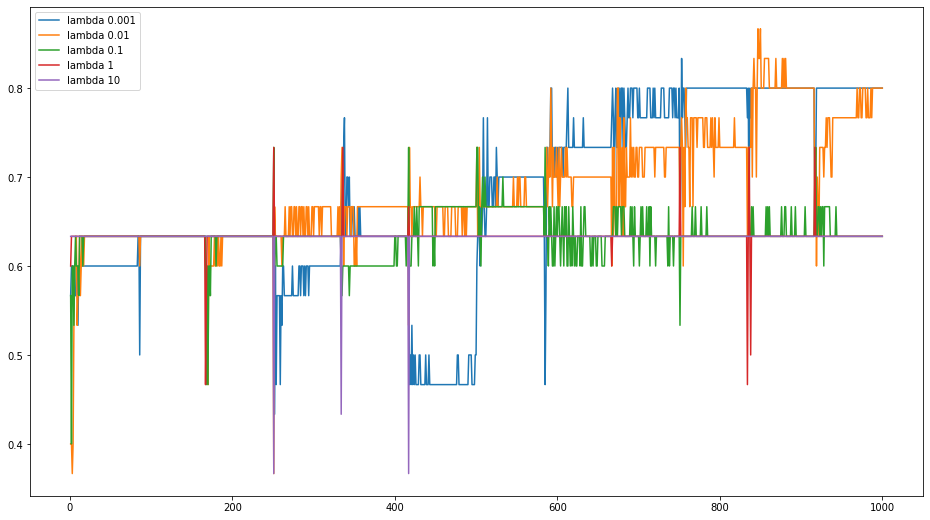

In [29]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_test_list)):
  plt.plot(x_epochs, accuracy_test_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 6(c) Plot of train set accuracy values for different values of lambda

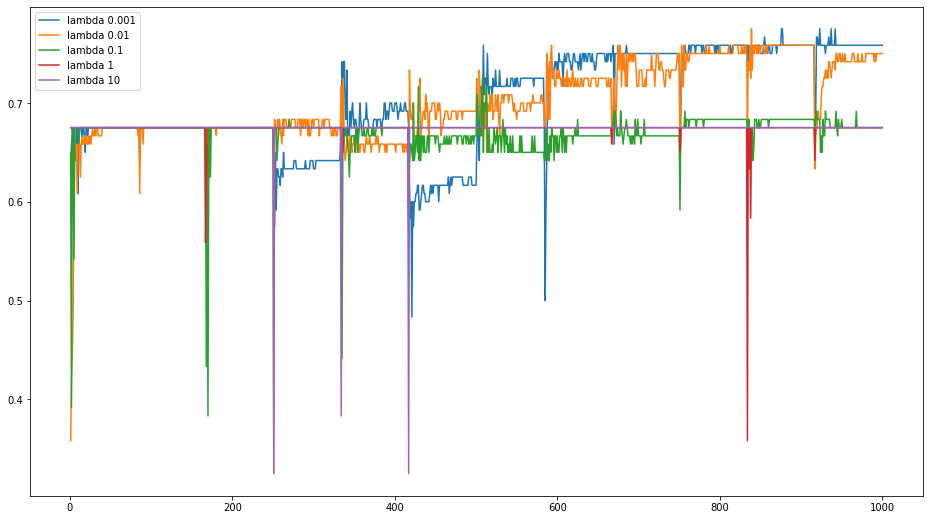

In [28]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_train_list)):
  plt.plot(x_epochs, accuracy_train_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

In [30]:
final_accuracy_train

[0.7583333333333333, 0.75, 0.675, 0.675, 0.675]

In [31]:
final_accuracy_test

[0.8, 0.8, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333]

#Ans 6 (d)

Train set accuracy values:

For lambda = 1e-3, 0.7583

For lambda = 1e-2, 0.75

For lambda = 0.1, 0.675

For lambda = 1, 0.675

For lambda = 10, 0.675

Test set accuracy values:

For lambda = 1e-3, 0.8

For lambda = 1e-2, 0.8

For lambda = 0.1, 0.63

For lambda = 1, 0.63

For lambda = 10, 0.63

#Ans 6(e)

We can see that the curves for all values of lambda are very squiggly in nature. We can see that for smaller values of lambda, we get higher accuracy value. We can also see that the test accuracy is greater than train accuracy in some cases.

One more observation that has been made is the accuracy changes with every random split of data.

In [50]:
def OPT1_mod(data, label, lamda):
  t = 1
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  obj_fn = [100,200]
  while abs(obj_fn[-1]-obj_fn[-2]) > 1e-7:
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = w - np.multiply(step, compute_grad_loss_h(data[i], label[i], w, lamda))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
  return w

w = OPT1_mod(train_data, train_label, 1e-3)
print(compute_accuracy(test_data, test_label, w))

0.7666666666666667


#Ans 7:

Another stopping criterion can be the difference of two consecutive objective function values, if it is less than some tolerance, we stop it.

For our case, we take tolerance 1e-7 and the computed test accuracy is just away from the previous test accuracy by 0.04.

#Loss Function, $L_l$

In [51]:
def compute_loss_l(w, x, y):
  return np.log(1 + np.exp(np.multiply(-y, np.matmul(w.transpose(), x))))

In [52]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_l(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [53]:
def compute_grad_loss_l(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    arr[i] = (lamda/n)*model_w[i] + np.divide((np.multiply((np.exp(np.multiply(-y,np.matmul(model_w,x)))),np.multiply(-y,x[i]))), 1 + (np.exp(np.multiply(-y,np.matmul(model_w,x)))))
  return arr

In [54]:
def OPT2(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = w - np.multiply(step, compute_grad_loss_l(data[i], label[i], w, lamda))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [36]:
num_epochs = 1000
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,1001)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT2(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

#Ans 8.6(a) Plot of objective function values for different values of lambda

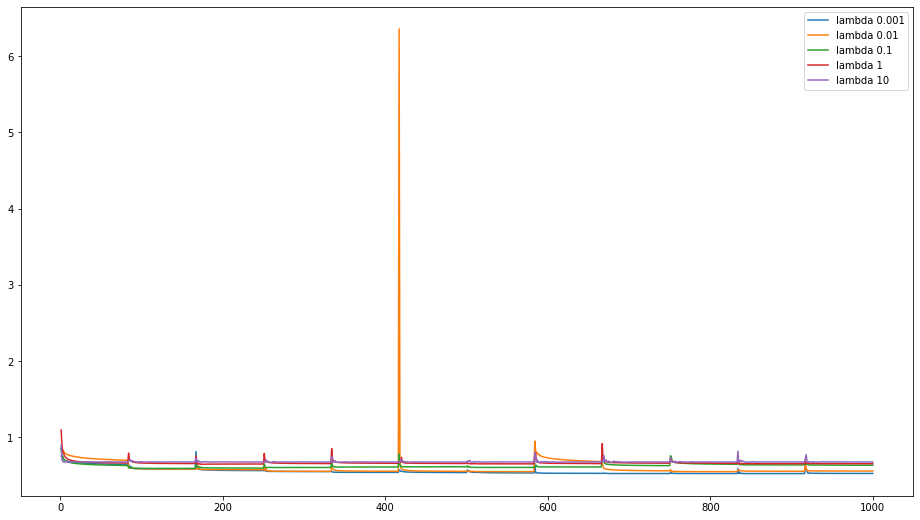

In [37]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 8.6(b) Plot of test set accuracy values for different values of lambda

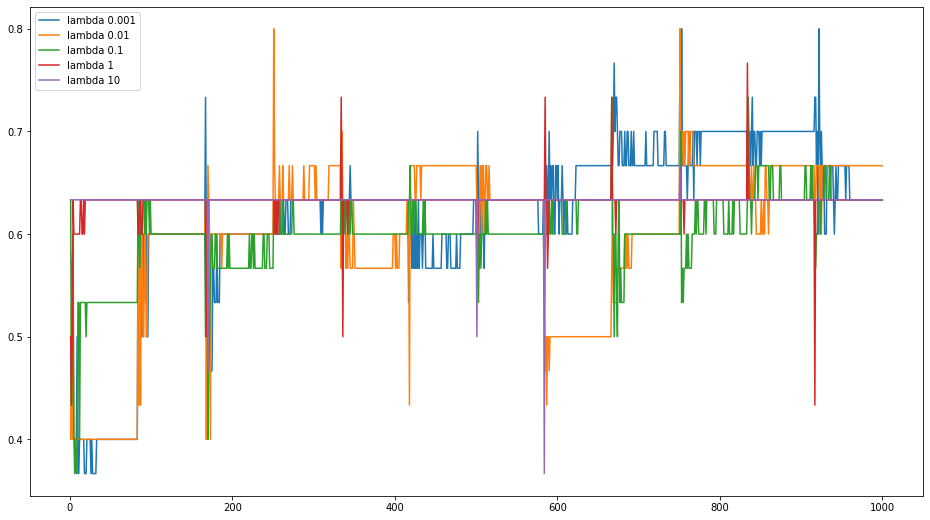

In [39]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_test_list)):
  plt.plot(x_epochs, accuracy_test_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 8.6(c) Plot of train set accuracy values for different values of lambda

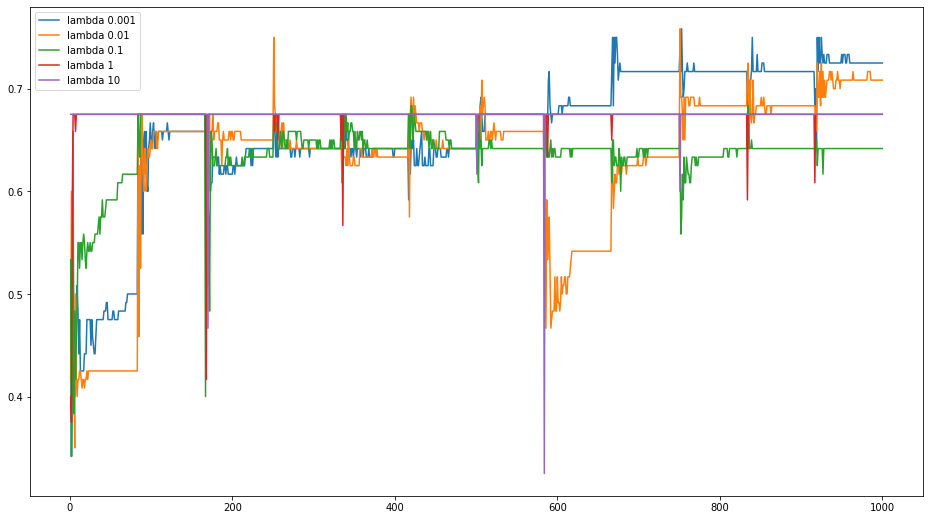

In [38]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_train_list)):
  plt.plot(x_epochs, accuracy_train_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

In [40]:
final_accuracy_train

[0.725, 0.7083333333333334, 0.6416666666666667, 0.675, 0.675]

In [41]:
final_accuracy_test

[0.6333333333333333,
 0.6666666666666666,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333]

#Ans 8.6 (d)

Train set accuracy values:

For lambda = 1e-3, 0.725

For lambda = 1e-2, 0.7083

For lambda = 0.1, 0.6416

For lambda = 1, 0.675

For lambda = 10, 0.675

Test set accuracy values:

For lambda = 1e-3, 0.63

For lambda = 1e-2, 0.66

For lambda = 0.1, 0.63

For lambda = 1, 0.63

For lambda = 10, 0.63

#Ans 8.6(e)

We can see that the curves for all values of lambda are very squiggly in nature. We can see that for smaller values of lambda, we get higher accuracy value. We can also see that the test accuracy is smaller than train accuracy here.

One more observation that has been made is the accuracy changes with every random split of data.

In [56]:
def OPT2(data, label, lamda):
  t = 1
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  obj_fn = [100,200]
  while abs(obj_fn[-1]-obj_fn[-2]) > 1e-7:
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = w - np.multiply(step, compute_grad_loss_l(data[i], label[i], w, lamda))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
  return w

w = OPT2(train_data, train_label, 1e-2)
print(compute_accuracy(test_data, test_label, w))

0.6666666666666666


#Ans 8.7:

In case of $L_l$

We take tolerance 1e-7 and the computed test accuracy is same as the previous one.

#Loss Function $L_{sh}$

In [57]:
def compute_loss_sh(w, x, y):
  return (max(0, 1 - np.multiply(y, np.matmul(w.transpose(), x)))**2)

In [58]:
def compute_objfnval(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_sh(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [59]:
def compute_grad_loss_sh(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    if compute_loss_sh(model_w, x, y) != 0:
      arr[i] = (lamda/n)*model_w[i] + np.multiply(-2*y*x[i],max(0, 1 - np.multiply(y, np.matmul(model_w.transpose(), x))))
    else:
      arr[i] = (lamda/n)*model_w[i]
  return arr

In [60]:
def OPT3(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = w - np.multiply(step, compute_grad_loss_sh(data[i], label[i], w, lamda))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [46]:
num_epochs = 1000
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,1001)]
obj_fnval_list = []
accuracy_train_list = []
accuracy_test_list = []
final_accuracy_test = []
final_accuracy_train = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT3(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  accuracy_train_list.append(acc_train)
  accuracy_test_list.append(acc_test)
  final_accuracy_test.append(compute_accuracy(test_data, test_label, model_w))
  final_accuracy_train.append(compute_accuracy(train_data, train_label, model_w))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


#Ans 8.6(a) Plot of objective function values for different values of lambda

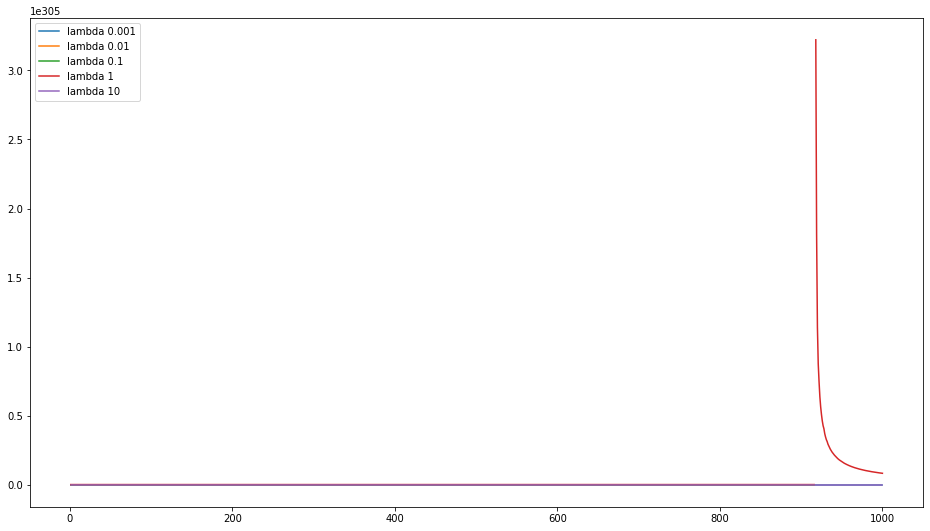

In [47]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 8.6(b) Plot of test set accuracy values for different values of lambda

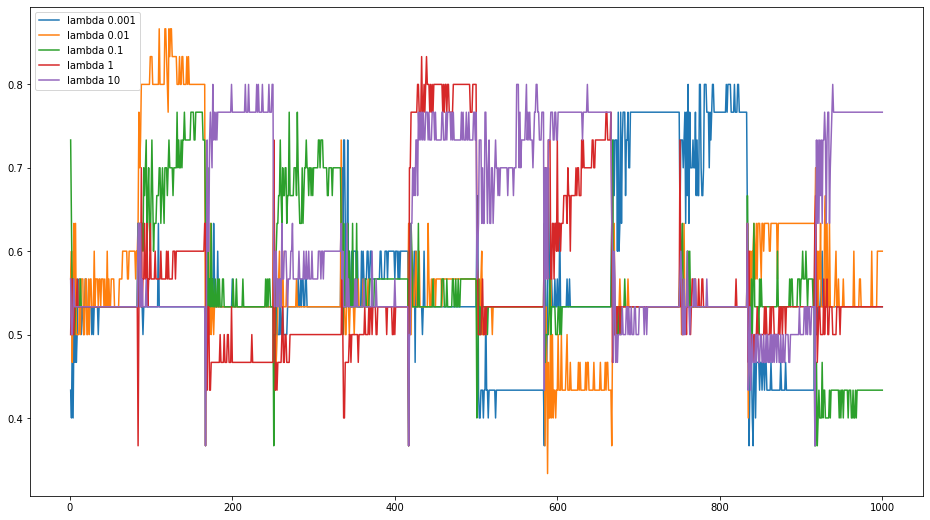

In [49]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_test_list)):
  plt.plot(x_epochs, accuracy_test_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

#Ans 8.6(c) Plot of train set accuracy values for different values of lambda

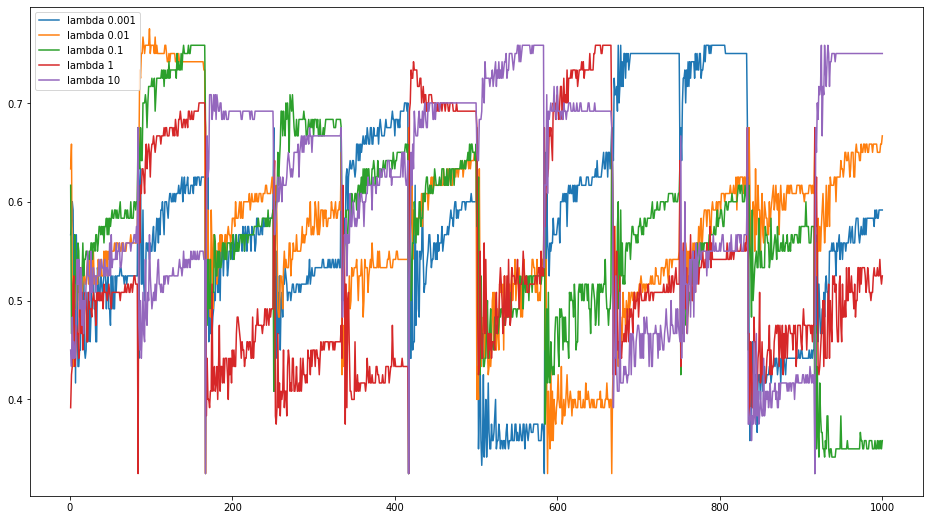

In [48]:
plt.figure(figsize = (16,9))
for i in range(len(accuracy_train_list)):
  plt.plot(x_epochs, accuracy_train_list[i], label = 'lambda '+str(lamdas[i]))
plt.legend()
plt.show()

In [50]:
final_accuracy_train

[0.5916666666666667, 0.6666666666666666, 0.35833333333333334, 0.525, 0.75]

In [51]:
final_accuracy_test

[0.5333333333333333,
 0.6,
 0.43333333333333335,
 0.5333333333333333,
 0.7666666666666667]

#Ans 8.6 (d)

Train set accuracy values:

For lambda = 1e-3, 0.5916

For lambda = 1e-2, 0.666

For lambda = 0.1, 0.3583

For lambda = 1, 0.525

For lambda = 10, 0.75

Test set accuracy values:

For lambda = 1e-3, 0.53

For lambda = 1e-2, 0.6

For lambda = 0.1, 0.43

For lambda = 1, 0.53

For lambda = 10, 0.76

#Ans 8.6(e)

We can see that the objective function value curve is same for all values of lambda except for lambda = 1

We can see that the accuracy curves for all values of lambda are very squiggly in nature. We can see that for the largest value of lambda, we get higher accuracy value with no pattern in the values. We can also see that the test accuracy is greater than train accuracy in some cases.

One more observation that has been made is the accuracy changes with every random split of data.

In [61]:
def OPT3(data, label, lamda):
  t = 1
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  obj_fn = [100,200]
  while abs(obj_fn[-1]-obj_fn[-2]) > 1e-7:
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = w - np.multiply(step, compute_grad_loss_sh(data[i], label[i], w, lamda))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfnval(data, label, w, lamda))
  return w

w = OPT3(train_data, train_label, 10)
print(compute_accuracy(test_data, test_label, w))

0.4666666666666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


#Ans 8.7:

In case of $L_{sh}$

We take tolerance 1e-7 and the computed test accuracy is very off than the previous test accuracy.